# Scatter plot - zależność liczby zakażeń, liczby osób zmarłych oraz gęstości zaludnienia na danym obszarze

Dane o gęstości zaludnienia i ilości ludności -  *Powierzchnia i ludność w przekroju terytorialnym w 2020 roku* - źródło: GUS

Dane o ilości osób zmarłych i zakażonych COVID-19: *COVID-19 w Polsce - zbiór danych stworzony przez Michała Rogalskiego*

In [1]:
s <- Sys.setlocale("LC_CTYPE","polish")
df <- read.csv("data/preprocessed/scatterplot.csv", fileEncoding = "UTF-8", stringsAsFactors = FALSE)
df <- df[ , -1]
colnames(df) <- c("wojewodztwo", "liczba_mieszkancow", "gestosc_zaludnienia", "liczba_zgonow", "liczba_zachorowan")
df

wojewodztwo,liczba_mieszkancow,gestosc_zaludnienia,liczba_zgonow,liczba_zachorowan
<chr>,<int>,<int>,<int>,<int>
Dolnośląskie,2900163,145,1162,67666
Kujawsko-Pomorskie,2072373,115,696,57489
Lubelskie,2108270,84,1130,49759
Lubuskie,1011592,72,375,21912
Łódzkie,2454779,135,868,60960
Małopolskie,3410901,225,1917,87167
Mazowieckie,5423168,153,1873,110359
Opolskie,982626,104,656,27922
Podkarpackie,2127164,119,1232,49102


In [2]:
df$ilosc_zachorowan_na_mln_mieszkancow <- df$liczba_zachorowan / df$liczba_mieszkancow *10^6
df$ilosc_zgonow_na_mln_mieszkancow <- df$liczba_zgonow / df$liczba_mieszkancow *10^6

In [3]:
head(df)

,wojewodztwo,liczba_mieszkancow,gestosc_zaludnienia,liczba_zgonow,liczba_zachorowan,ilosc_zachorowan_na_mln_mieszkancow,ilosc_zgonow_na_mln_mieszkancow
,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,Dolnośląskie,2900163,145,1162,67666,23331.79,400.6671
2,Kujawsko-Pomorskie,2072373,115,696,57489,27740.66,335.8469
3,Lubelskie,2108270,84,1130,49759,23601.82,535.9845
4,Lubuskie,1011592,72,375,21912,21660.91,370.7028
5,Łódzkie,2454779,135,868,60960,24833.19,353.5960
6,Małopolskie,3410901,225,1917,87167,25555.42,562.0216


In [4]:
library(dplyr)

df_labeled <- df
df_labeled$label_for_plot <- rep("", 16)

#df_labeled <- df_labeled[order(-df$ilosc_zgonow_na_mln_mieszkancow),]
df_labeled <- df_labeled %>% arrange(-ilosc_zgonow_na_mln_mieszkancow)
df_labeled[1:2, "label_for_plot"] <- df_labeled[1:2, "wojewodztwo"]

df_labeled <- df_labeled %>% arrange(ilosc_zachorowan_na_mln_mieszkancow)
#df_labeled <- df_labeled[order(-df$ilosc_zachorowan_na_mln_mieszkancow),]
df_labeled[1, "label_for_plot"] <- df_labeled[1, "wojewodztwo"]

df_labeled


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




wojewodztwo,liczba_mieszkancow,gestosc_zaludnienia,liczba_zgonow,liczba_zachorowan,ilosc_zachorowan_na_mln_mieszkancow,ilosc_zgonow_na_mln_mieszkancow,label_for_plot
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>
Mazowieckie,5423168,153,1873,110359,20349.54,345.3701,Mazowieckie
Podlaskie,1178353,58,492,25309,21478.28,417.5319,
Lubuskie,1011592,72,375,21912,21660.91,370.7028,
Zachodniopomorskie,1696193,74,516,38495,22694.94,304.2107,
Podkarpackie,2127164,119,1232,49102,23083.32,579.1749,Podkarpackie
Warmińsko-Mazurskie,1422737,59,632,33033,23217.92,444.2142,
Świętokrzyskie,1233961,105,581,28748,23297.33,470.8415,
Dolnośląskie,2900163,145,1162,67666,23331.79,400.6671,
Pomorskie,2343928,128,941,54846,23399.18,401.4628,


Warning message:
"package 'ggrepel' was built under R version 4.0.3"
Saving 6.67 x 6.67 in image



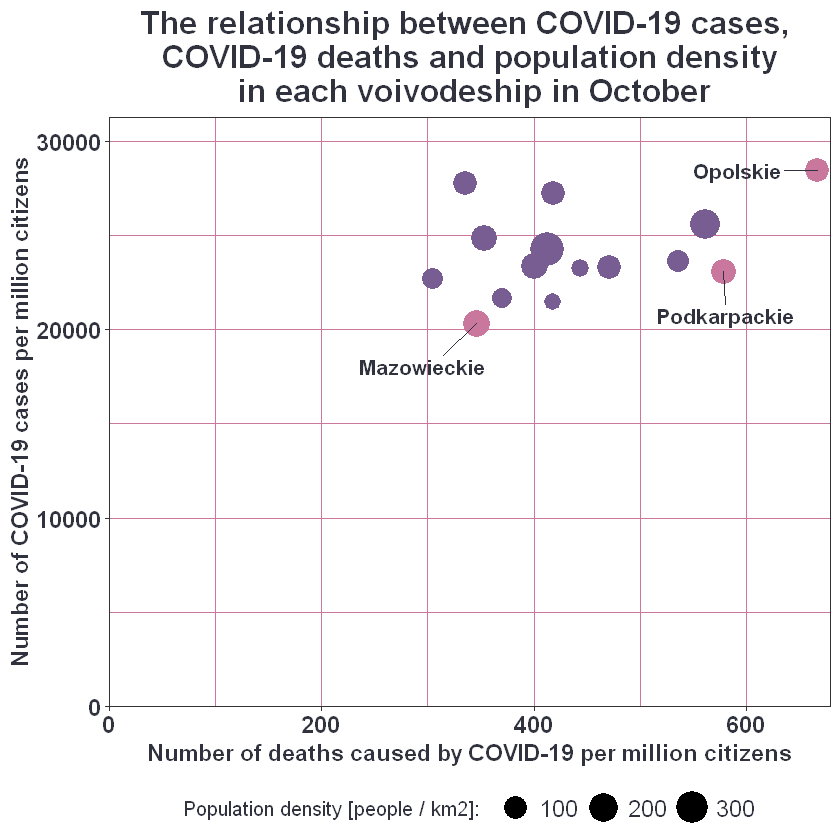

In [5]:
library(ggplot2)
library(ggrepel)
library(ggthemes)

#library(repr)
#options(repr.plot.width=10, repr.plot.height=10)

ggplot(df_labeled, aes(x = ilosc_zgonow_na_mln_mieszkancow, y = ilosc_zachorowan_na_mln_mieszkancow, label = label_for_plot)) +
  geom_point(stroke = 3, aes(size = gestosc_zaludnienia), color = ifelse(df_labeled$label_for_plot != "", "#c9779c", "#785d92")) +
  geom_text_repel(min.segment.length = 0, box.padding = 1.5, size = 4.5, fontface = "bold", color = "#30333e") +
  xlab("Number of deaths caused by COVID-19 per million citizens") +
  ylab("Number of COVID-19 cases per million citizens") +
  ggtitle("The relationship between COVID-19 cases, \n COVID-19 deaths and population density \n in each voivodeship in October") +
  labs(size = "Population density [people / km2]:") +
  scale_x_continuous(expand = c(0, 0), limits = c(0, 680)) + 
  scale_y_continuous(expand = c(0, 0), limits = c(0, max(df$ilosc_zachorowan_na_mln_mieszkancow) * 1.1)) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, color = "#30333e", size = 19, face = "bold"),
       legend.position="bottom",
       axis.text = element_text(color = "#30333e", size = 14, face = "bold"),
       axis.title = element_text(color = "#30333e", size = 14, face = "bold"),
       legend.text = element_text(size=14, color = "#30333e"),
       legend.title = element_text(size=12, color = "#30333e"),
       panel.background = element_rect(fill = "transparent", colour = NA),
       plot.background = element_rect(fill = "transparent", color = NA),
       legend.background = element_rect(fill = "transparent"),
       panel.grid = element_line(colour = "#c9779c")
       #legend.box.background = element_rect(fill = "transparent")
       )

ggsave("charts/scatter_plot.png", bg = "transparent")